# Лабораторная работа 3, задача 2, вариант 17

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def spline(a, b, c, d, x0, x):
    return a + b * (x0 - x) + c * (x0 - x)**2 + d * (x0 - x)**3

In [ ]:
def runMethod(c, f, size):
    cn = np.zeros(size)
    fn = np.zeros(size)
    yn = np.zeros(size)
    xn = np.zeros(size)

    for i in range(0, size):
        if i == 0:
            yn[i] = c[i][i]
            cn[i] = -c[i][i + 1] / yn[i]
            fn[i] = f[i] / yn[i]
        elif i == size - 1:
            yn[i] = c[i][i] + c[i][i-1] * cn[i-1]
            fn[i] = (f[i] - c[i][i-1] * fn[i-1]) / yn[i]
        else:
            yn[i] = c[i][i] + c[i][i-1] * cn[i-1]
            cn[i] = -c[i][i+1] / yn[i]
            fn[i] = (f[i] - c[i][i-1] * fn[i-1]) / yn[i]

    xn[size-1] = fn[size-1]
    i = size-2
    while i >= 0:
        xn[i] = cn[i] * xn[i+1] + fn[i]
        i = i - 1

    return xn

In [ ]:
# определение трехдиагональной матрицы для метода прогонки
def getCi(x, f, size):

    c = np.zeros((size-2, size-2))
    fpr = np.zeros(size-2)

    for i in range(0, size-2):
        if i == 0:
            c[i][i] = 2*(x[i+2] - x[i])
            c[i][i+1] = x[i+2] - x[i+1]

        elif i == size-3:
            c[i][i - 1] = x[i + 1] - x[i]
            c[i][i] = 2 * (x[i + 2] - x[i])

        else:
            c[i][i - 1] = x[i + 1] - x[i]
            c[i][i] = 2 * (x[i + 2] - x[i])
            c[i][i + 1] = x[i + 2] - x[i + 1]
        fpr[i] = 3 * ((f[i + 2] - f[i + 1]) / (x[i + 1] - x[i])-(f[i + 1] - f[i]) / (x[i + 2] - x[i + 1]))

    return runMethod(c, fpr, size-2)

In [ ]:
def getCoeffs(f,x,a,b,c,d):
  tmp = np.zeros(n-2)
  tmp = getCi(x, f, n)
  c[0] = 0
  for i in range(1, n-1):
      c[i] = tmp[i-1]  
      for i in range(0, n-1):
        a[i] = f[i]
        hi = x[i+1]-x[i]
        if i != n-2:
            b[i] = (f[i+1]-f[i]) / hi - hi * (c[i+1] + 2 * c[i]) / 3
            d[i] = (c[i+1] - c[i]) / (3 * hi)

  hn = x[n - 1] - x[n - 2]
  b[n - 2] = (f[n - 1] - f[n - 2]) / hn - 2 * hn * c[n - 2] / 3;
  d[n - 2] = -c[n - 2] / hn / 3  

Вариант 17:
$$
x = [-2, -1, 0, 1, 2]\\
f = [-1.8647, -0.63212, 1.0, 3.7183, 9.3891]
$$

In [ ]:
n = 5
x0 = -0.5
x = [-2, -1, 0, 1, 2]
f = [-1.8647, -0.63212, 1.0, 3.7183, 9.3891]

In [ ]:
a = np.zeros(n-1)
b = np.zeros(n-1)
c = np.zeros(n-1)
d = np.zeros(n-1)

getCoeffs(f,x,a,b,c,d)

for i in range(0, n-1):
    # высчитываем значение сплайна в заданной точке
    val = spline(a[i], b[i], c[i], d[i], x0, x[i])
    if (x0 <= x[i + 1]) and (x0 >= x[i]):
        print("Значение функции в x0 = " + str(val))

Значение функции в x0 = 0.12654089285714284


Построим графики сплайнов на интервалах

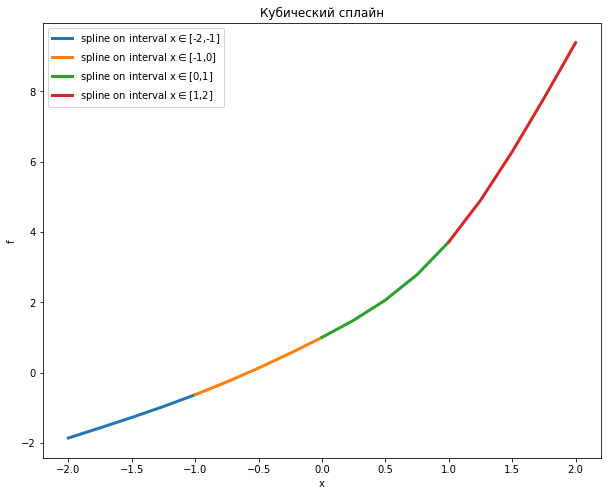

In [ ]:
val = np.zeros((n-1, 5))
x_test = np.zeros((n-1, 5))
legends = []
plt.figure(figsize=(10,8))
for i in range(0, n - 1):
    x_test[i] = np.linspace(x[i], x[i + 1], 5)
    legends.append("spline on interval x$\in$[" + str(x[i]) + "," + str(x[i + 1]) + "]")
    counter = 0
    for x_local in x_test[i]:
        val[i][counter] = spline(a[i], b[i], c[i], d[i], x_local, x[i])
        counter = counter + 1
    plt.plot(x_test[i], val[i], linewidth="3")

plt.title("Кубический сплайн");
plt.xlabel('x')
plt.ylabel('f')
plt.legend(legends)
plt.show()